# Problem Set 2 - Deadline 02/02/2023

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|
|grc97  |grade enrolled in 1997

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean, median and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [434]:
# your code here
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
df = pd.read_csv('/Users/jaredschober/Documents/GSPP/Spring_2023/INFO251/progresa_sample.csv')

In [435]:
df = df.reindex(sorted(df.columns), axis=1)

# Creating dummy variables for poor and progresa so they can be included in the table
df['poor'] = (df['poor']=='pobre').astype(int)
df['progresa'] = (df['progresa']=='basal').astype(int)

# Dropping year, folnum and village
table = df.loc[:,['age', 'dist_cap', 'dist_sec', 'fam_n', 'grc', 'grc97',
       'hohage', 'hohedu', 'hohsex', 'hohwag', 'indig', 'min_dist', 'poor',
       'progresa', 'sc', 'sc97', 'sex', 'welfare_index']]

table.describe().T.loc[:,['mean','50%', 'std']]

,mean,50%,std
age,11.366460,11.000000,3.167744
dist_cap,147.674452,132.001494,76.063134
dist_sec,2.418910,2.279000,2.234109
fam_n,7.215715,7.000000,2.352900
grc,3.963537,4.000000,2.499063
grc97,3.705372,4.000000,2.572387
hohage,44.436717,43.000000,11.620372
hohedu,2.768104,2.000000,2.656106
hohsex,0.925185,1.000000,0.263095
hohwag,586.985312,500.000000,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre'). 
 
For this question and subsequent questions, you can use either Welch's t-test or Student's t-test. Please specify in one sentence why you chose the particular t-test.


In [419]:
# your code here

# Filtering all years besides 97
baseline_df = df[df['year']==97]

# Only looking at data from poor households
baseline_df = baseline_df[baseline_df['poor']==1]
baseline_df = baseline_df.drop(['year', 'poor'], axis=1)
treatment = baseline_df[baseline_df['progresa']==1]
control = baseline_df[baseline_df['progresa']==0]

# Creating results table
results = baseline_df.columns.to_frame()
results = results.drop(labels=0, axis=1)
results['Average value (Treatment villages)'] = treatment.mean()
results['Average value (Control villages)'] = control.mean()
results['Difference (Treat - Control)'] = treatment.mean() - control.mean()
results['p-value'] = sp.stats.ttest_ind(treatment, control, equal_var=False, nan_policy='omit')[1]
results = results.reset_index().rename(columns={'index':'Variable name'}).dropna()
results = round(results,4)
results

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,age,10.7170,10.7420,-0.0250,0.4784
1,dist_cap,150.8291,153.7697,-2.9407,0.0011
2,dist_sec,2.4531,2.5077,-0.0545,0.0427
3,fam_n,7.2813,7.3025,-0.0211,0.4290
4,folnum,19321.1682,19272.8443,48.3239,0.7053
5,grc,3.5316,3.5430,-0.0115,0.6895
6,grc97,3.5316,3.5430,-0.0115,0.6895
7,hohage,43.6488,44.2769,-0.6281,0.0000
8,hohedu,2.6631,2.5903,0.0728,0.0104
9,hohsex,0.9247,0.9229,0.0017,0.5721


In [420]:
results['p-value']<.05

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10     True
11    False
12     True
14    False
15    False
16     True
17     True
18     True
Name: p-value, dtype: bool

The table above shows that about half of the p-values are statistically significant at the p<0.05 critical value, while about half are not. This indicates a statistically signficiant difference in means for about half of the variables, in particular those related to place (e.g. distance to the capital or a secondary school), household (e.g. head of household wage, age, education, indigenous status), and school enrollment (e.g. sc, sc97). These differences are important because it shows that there are differences between treatment and control groups, which puts at risk our identifying assumption for a randomized experiment.

### Student's t-test or Welch's t-test
I used Welch's t-test for unequal variances because I think it's the more conservative estimate based on the Progresa program. It's not clear to me whether much care was taken into random assignment of treatment vs. control by the Mexican authorities. Also, even if the variances are equal, Welch's t-test should yield a similar answer to student's t-test. Below, I present the results of a simple difference in variances. Some variables have equal variance and others don't, which is also part of why I chose to use Welch's t-test.

In [439]:
(baseline_df[baseline_df['progresa']==1].var() - baseline_df[baseline_df['progresa']==0].var())\
.to_frame().rename(columns={0:'Difference in variances'})

,Difference in variances
age,3.642382e-02
dist_cap,-1.366121e+03
dist_sec,-1.616718e+00
fam_n,-1.866859e-01
folnum,-8.022733e+06
grc,-9.193133e-02
grc97,-9.193133e-02
hohage,-1.104694e+01
hohedu,4.521093e-01
hohsex,-1.450621e-03


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

*Discuss your results here*

* A: There are statistically significant differences between treatment and control villages at baseline for some (rather important) variables, including: Distance to the Capital, Head of Household age, education, and wages, minimum distance to an urban center, sex of the child, and welfare index.
* B: It matters if there are differences at baseline because our identifying assumption is that both groups are basically the same, and the control group can serve as a valid counterfactual for the world in which there was no treatment.
* C: Since there are statistically signficiant differences between treatment and control villages at baseline, it means we cannot attribute any observed differences in means after treatment solely to the intervention. There were differences at baseline, so there are outside factors influencing our results.

### 1.4 Graphical exploration, part 1

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

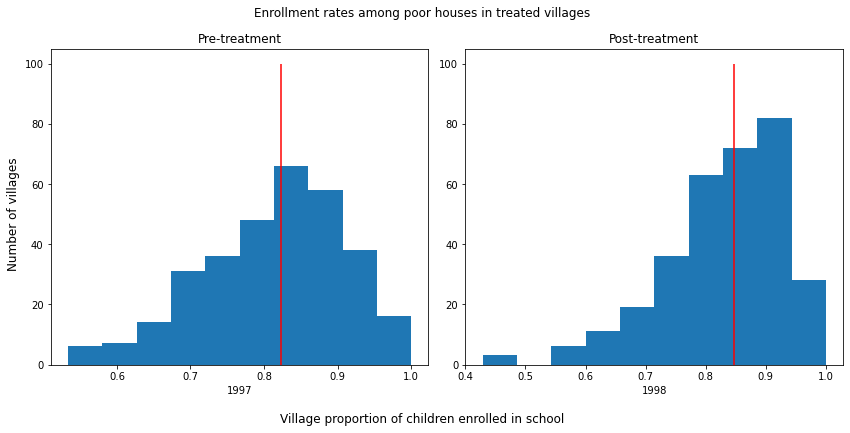

In [421]:
# Your code here
graph = df[df['poor']==1]
graph = graph[graph['progresa']==1]
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].hist(graph[graph['year']==97].groupby('village').mean()['sc'])
ax[1].hist(graph[graph['year']==98].groupby('village').mean()['sc'])
plt.suptitle("Enrollment rates among poor houses in treated villages")
ax[0].set_xlabel("1997")
ax[0].set_title("Pre-treatment")
ax[1].set_xlabel("1998")
ax[1].set_title("Post-treatment")
fig.supylabel("Number of villages")
fig.supxlabel("Village proportion of children enrolled in school")
ax[0].vlines(graph[graph['year']==97].mean()['sc'], 0,100, colors='red') # Need to adjust 0.8 to actual mean
ax[1].vlines(graph[graph['year']==98].mean()['sc'], 0,100, colors='red') # Need to adjust 0.8 to actual mean
plt.tight_layout();

In [440]:
# T-test to see if mean difference is statistically significant
sp.stats.ttest_ind(graph[graph['year']==97]['sc'].dropna(), graph[graph['year']==98]['sc'].dropna(), equal_var=True).pvalue

1.2976490728161e-09

*From the histograms, it does appear that more villages moved to the right (e.g. enrolled a higher proportion of their schoolage children in schools) in 1998 compared to 1997. Furthermore, it appears that the average proportion of enrolled students moved from the low-80's to the mid-80's. Also, a t-test of mean difference in school enrollment among treated villages in 1997 and 1998 yields a p-value of 1.297e-09, which is much lower than the critical value of p<0.05. Therefore, we can conclude that there was a statistically signficiant difference in school enrollment in 1998 compared to 1997 among treated villages.*


### 1.5 Graphical exploration, part 2

Repeat the above exercise for poor households in **control villages**, before and after treatment. Do you observe a difference in enrollment in control villages between 1997 and 1998? How does what you observe here affect how you might approach measuring the impact of PROGRESA?

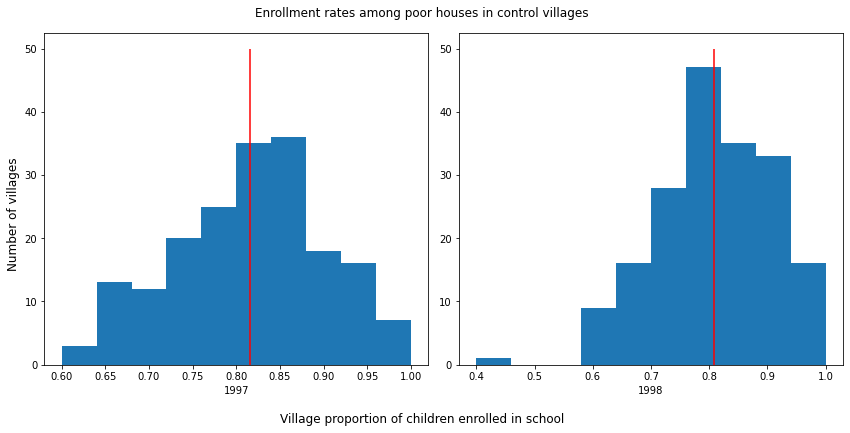

In [325]:
# Your code here
graph = df[df['poor']==1]
graph = graph[graph['progresa']==0]
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].hist(graph[graph['year']==97].groupby('village').mean()['sc'])
ax[1].hist(graph[graph['year']==98].groupby('village').mean()['sc'])
plt.suptitle("Enrollment rates among poor houses in control villages")
ax[0].set_xlabel("1997")
ax[1].set_xlabel("1998")
fig.supylabel("Number of villages")
fig.supxlabel("Village proportion of children enrolled in school")
ax[0].vlines(graph[graph['year']==97].mean()['sc'], 0,50, colors='red') # Need to adjust 0.8 to actual mean
ax[1].vlines(graph[graph['year']==98].mean()['sc'], 0,50, colors='red') # Need to adjust 0.8 to actual mean
plt.tight_layout();

In [326]:
# T-test to see if mean difference is statistically significant
sp.stats.ttest_ind(graph[graph['year']==97]['sc'].dropna(), graph[graph['year']==98]['sc'].dropna(), equal_var=True)[1]

0.1511345297015608

*For control villages, there is essentially no difference between 1997 and 1998 enrollment rates, and the p-value from a t-test for difference in means is 0.15, which is above the critical value. Therefore, we cannot conlude that there is a statistically significant difference from 1997 to 1998. This makes sense, because these villages were not included in the program.*

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on school enrollment rates among the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance, and since a primary objective of the program was to increase school enrollment.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

For this question and subsequent questions, you can use either Welch's t-test or Student's t-test. Please specify in one sentence why you chose the particular t-test.

In [441]:
# Your code here
post = df[df['year']==98].copy()
post = post[post['poor']==1]
treatment = post[post['progresa']==1]
control = post[post['progresa']==0]
print(treatment['sc'].mean())
print(control['sc'].mean())
print(treatment['sc'].mean() - control['sc'].mean())
sp.stats.ttest_ind(treatment['sc'].dropna(), control['sc'].dropna(), equal_var=False).pvalue

0.8464791213954308
0.807636956730308
0.0388421646651228


2.9655072988948406e-16

*I found that the treatment group in 1998 had an average enrollment rate of ~84.7%, while the control group in 1998 had an average enrollment rate of ~80.8%, for a total difference of 3.88 percentage points. I conducted a Welch's t-test with unequal variances since I found in part 1 differential baseline characteristics among the treatment and control groups. I found a p-value of well below 0.05, meaning we reject the null hypothesis of no statistically signficiant difference (i.e. the difference of almost 3.9 percentage points is statistically significant).*

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [442]:
# Your code here
model = smf.ols(formula='sc ~ progresa', data=post).fit() # Automatically includes the intercept term
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           6.64e-17
Time:                        09:04:44   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.0

*Based on this model, I believe the Progresa program is associated with a 3.88 percentage point increase in school enrollment among children in a treatment village. This is the same effect we found with our t-test of differences in means in part 2.1. Based on this model, we can reject the null hypothesis that the treatment effects are zero, because our t-value of 8.359 for the effect of progresa on enrollment corresponds to a p-value of almost 0 - far less than the critical value of p<0.05. The counterfactual assumption underlying this regression is that the control group is a good model for the state of the world where the treatment group received no treatment.*

### 2.3 Multiple Regression

Re-run the above regression, but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [335]:
# Your code here
model = smf.ols(formula='sc ~ progresa + age + dist_sec + sex + hohedu + welfare_index + indig', data=post).fit() # Automatically includes the intercept term
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1419.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:07:33   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.529e+04
Df Residuals:                   27259   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5025      0.014    105.342

*The controls decrease the point estimate of the treatment effect from 3.88 percentage points to 3.52 percentage points. This implies there was some omitted variable bias in our initial specification. The standard error of the treatment effect reduced from 0.005 to 0.004 - which is a small change in absolute value, but about a 20% relative change. This shows an increase in the confidence of the treatment effect size. I interpret these differences to mean that we have improved our model between 2.2 and 2.3 by adding in additional control variables (including ones that caused us to overestimate the treatment effect of progresa by omitting them).*

*The coefficient on dist_sec of -0.0117 indicates that a change in one unit of dist_sec (e.g. either one mile or one kilometer) is associated with a 1.17 percentage point decrease in child enrollment. This isn't necessarily evidence of a causal relationship between distance to secondary education and child enrollemnt, just a correlational relationship. To establish a causal relationship between enrollment and distance to school, we would need to experimentally vary the distance to school (at least that's one way to establish that causal connection).*

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [443]:
# Your code here
pre = df[df['year']==97].copy()
pre = pre[pre['poor']==1]
pre_treat = pre[pre['progresa']==1].copy()
pre_control = pre[pre['progresa']==0].copy()
post_treat = post[post['progresa']==1].copy()
post_control = post[post['progresa']==0].copy()

# Need to make this into a table
d = {'1997': [pre_control['sc'].mean(), pre_treat['sc'].mean()], \
     '1998': [post_control['sc'].mean(), post_treat['sc'].mean()]}
did_table = pd.DataFrame(data=d, index=['Control', 'Treatment'])
did_table

,1997,1998
Control,0.815186,0.807637
Treatment,0.822697,0.846479


In [444]:
# Difference in difference estimate = (1997_treat - 1997_control) + (1998_treat - 1998_control)
did_estimate = (did_table['1998']['Treatment'] - did_table['1998']['Control']) - (did_table['1997']['Treatment'] - did_table['1997']['Control'])
print("DiD estiamte: {}".format(did_estimate))

DiD estiamte: 0.031331280319323085


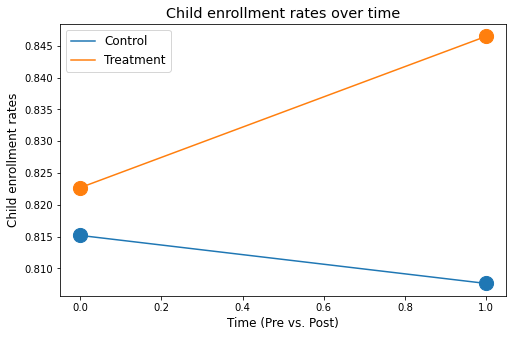

In [445]:
# I pulled the visual from the lab to help with interpretation - it looks like it is about a difference of 4.6%!
fig = plt.figure(figsize=(8, 5))
plt.scatter([0, 1], [pre_control['sc'].mean(), post_control['sc'].mean()], s=200)
plt.plot([0, 1], [pre_control['sc'].mean(), post_control['sc'].mean()], label='Control')
plt.scatter([0, 1], [pre_treat['sc'].mean(), post_treat['sc'].mean()], s=200)
plt.plot([0, 1], [pre_treat['sc'].mean(), post_treat['sc'].mean()], label='Treatment')
plt.legend(loc='best', fontsize='large')
plt.xlabel('Time (Pre vs. Post)', fontsize='large')
plt.ylabel('Child enrollment rates', fontsize='large')
plt.title('Child enrollment rates over time', fontsize='x-large')
plt.show()

*The difference-in-difference estimate of the impact of Progresa on 1998 enrollment rates is 3.13 percentage points. This is smaller than our simple difference estimate from above, which we found to be 3.88 percentage point (or 3.52 percentage point with our multivariate model).*

*The counterfactual assumption underlying this estimate is the parallel trends assumption, also stated as control group villages and treatment group villages had parallel trends before treatment (e.g. either no change or change moving in the same direction at the same rate). This is similar to our counterfactual assumption for a randomized control trial - essentially, that the control group represents the state of the world in the absence of treatment (and that it's a good comparison group).*

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [382]:
# Your code here
poor = df[df['poor']==1]
model = smf.ols(formula='sc ~ progresa*year', data=poor).fit() # Automatically includes the intercept term
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           2.76e-18
Time:                        09:58:50   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5474      0.497      3.112

In [383]:
model = smf.ols(formula='sc ~ progresa*year + age + dist_sec + sex + hohedu + welfare_index + indig', data=poor).fit() # Automatically includes the intercept term
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     2488.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:04:59   Log-Likelihood:                -16656.
No. Observations:               58013   AIC:                         3.333e+04
Df Residuals:                   58003   BIC:                         3.342e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2257      0.425     -2.881

*The estimate of the impact of Progresa from the simple DiD without control variables is -3.03 (0.632), while the difference in difference estimate of the interaction of Progresa and Year is .0313 (0.005) or 3.13 percentage points with a standard error of 0.5. This makes sense, because the Progresa program was launched in places where the need seemed higher, so the presence of the Progresa program likely means lower enrollment rates. However, looking at the interaction term, it is clear that there is a 3.13 percentage point increase in school enrollment in the second year of the program.*

*Adding in control variables does change the estimate of Progresa's impact. The effect of Progresa overall and the progresa*year interaction term remain somewhat similar (-3.03 (0.632)) vs. -2.98 (0.539), and 0.0313 (0.006) vs. 0.0309 (0.006)). However, the effect of year changes sign and becomes statistically significant. Specifically, the coefficient on year in the first specification was -0.0075 with a standard error of 0.005, while in the second specification it became 0.0278 with standar error of 0.004. This indicates that there was omitted variable bias in the first specification that was causing us to downwardly estimate the effect of year on student enrollment.*

*The difference in difference estimates in the first model without control variables is the same as our estimate in 2.4 (3.13 percentage points). However, once we add in control variables, the estimated effect reduces to 3.09 percentage points - a small change, and one that doesn't effect our standard errors (0.006) at all.*

*The counterfactual assumption underlying specification (ii) is that, given similarities in the control variables added, the parallel trends assumption still holds. Stated another way, given age, distance to school, sex, household education, welfare index and indigenous status, families with similar characteristics in the treatment and control groups have the same trends over time. Under this assumption, any differences in change over time we see given those control variables can be associated with treatment status.*

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on the school enrollment of poor households. Repeat your analysis in 2.5, instead focusing on (a) the impact of PROGRESA on the school enrollment of non-poor households, and (b) the impact ofo PROGRESA on *other outcomes* of poor households that might plausibly have been affected by the PROGRESA program.
* Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?
* Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
* Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? 

In [385]:
# Your code here
not_poor = df[df['poor']==0]
model = smf.ols(formula='sc ~ progresa*year', data=not_poor).fit() # Automatically includes the intercept term
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.332
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           0.000276
Time:                        13:28:17   Log-Likelihood:                -5448.5
No. Observations:               10425   AIC:                         1.090e+04
Df Residuals:                   10421   BIC:                         1.093e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5712      1.241     -0.460

In [386]:
model = smf.ols(formula='sc ~ progresa*year + age + dist_sec + sex + hohedu + welfare_index + indig', data=not_poor).fit() # Automatically includes the intercept term
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     453.6
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:28:51   Log-Likelihood:                -3675.3
No. Observations:               10334   AIC:                             7371.
Df Residuals:                   10324   BIC:                             7443.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.3119      1.059     -2.183

In [392]:
model = smf.ols(formula='welfare_index ~ progresa*year + sc + age + dist_sec + sex + hohedu + indig', data=poor).fit() # Automatically includes the intercept term
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          welfare_index   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     224.3
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:34:11   Log-Likelihood:            -3.5628e+05
No. Observations:               58013   AIC:                         7.126e+05
Df Residuals:                   58003   BIC:                         7.127e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1194.7845    148.246      8.059

In [394]:
model = smf.ols(formula='hohwag ~ progresa*year + sc + age + welfare_index + sex + hohedu + indig', data=poor).fit() # Automatically includes the intercept term
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 hohwag   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     220.3
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:37:51   Log-Likelihood:            -4.6213e+05
No. Observations:               58013   AIC:                         9.243e+05
Df Residuals:                   58003   BIC:                         9.244e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -597.5761    919.686     -0.650

*When we look at not poor houses, there doesn't seem to be any statistically significant effect of progresa or the progresa*year interaction term. The beta coefficients are all very close to zero, with correspondingly high p-values.*

*PROGRESA might have had a spillover effect on non-poor houses regardless of my above findings for a couple of reasons. First,there may have been social effects of the program. If families know the program is going on in their school/village and are seeing other families stress school attendance, there might be social pressure on non-poor families to also improve their students school attendance. Second, since families were financially rewarded for their childrens' school attendance, this creates an incentive for non-poor families to game the system, pose as poor families, and try to also reap the financial rewards of the program.*

*I reran the analysis from 2.5 to see if there were any effects of Progresa on welfare_index and hohwag. I hypothesized that the children being enrolled in school might have a positive effect on household welfare since enrollment is associated with cash transfers from the government. Similarly, I thought that children being in school might free up the parents to earn more money. However, there wasn't a statistically significant effet of Progresa on either of these metrics. Specifically, the regressions indicate that the difference and difference estimate of progresa*year on welfare_index is -0.99, or a reducation of almost 1 full point on the welfare index. For head of household wages, the effect size was -13.58, or a reduction of about 13.5 pesos per year.*

### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 


*Based on all of the above analyses, I do believe that Progresa had a causal impact on enrollment rates of poor houses in Mexico. In particular, the difference in difference model was very persuasive, both graphically and statistically. Furthermore, the fact that the statistical significance went away in the DiD models when we looked at non-poor families indicates to me that there is a real relationship being captured in the models. A 3-4 percentage point increase in enrollment rates in one year is also a really big change, particularly when the enrollment rate average was already in the low-80%s. Since this change happened the year after the program was implemented, I think there's a strong case for a causal relationship.*